<a href="https://colab.research.google.com/github/MarcelaFerreiraR/AnaliseDeDados/blob/main/Analise_Descritiva_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analise Descritiva**

Vamos estudar a análise descritiva e como fazer uma análise bem feita.  

A análise descritiva é o primeiro passo em qualquer processo de exploração de dados. Seu objetivo é **resumir, organizar e compreender as características principais de um conjunto de informações**, permitindo que possamos responder perguntas como:

- O que aconteceu nos dados?
- Quais são os valores típicos ou centrais?
- Existe muita variação ou os dados são consistentes?
- Há padrões, tendências ou outliers que chamam atenção?
- Como diferentes grupos se comportam dentro da base?

Nesta etapa, não buscamos prever o futuro ou explicar causalidades profundas, mas sim **entender o presente dos dados** de forma clara e estruturada.

# Sumário - Estudo de Análise Descritiva

1. Introdução à Análise Descritiva

2. Medidas de Tendência Central
   - Média (aritmética, ponderada, geométrica, harmônica)
   - Mediana
   - Moda

3. Medidas de Dispersão
   - Amplitude
   - Variância
   - Desvio Padrão
   - Coeficiente de Variação
   - Intervalo Interquartílico (IQR)

4. Distribuição dos Dados
   - Histogramas
   - Boxplots
   - Curva de Densidade

5. Análise de Correlação
   - Covariância
   - Correlação de Pearson
   - Correlação de Spearman

6. Análise Categórica
   - Tabelas de Frequência
   - Crosstab (tabelas cruzadas)
   - Gráficos de barras e setores

7. Visualização Exploratória
   - Quando usar cada tipo de gráfico
   - Exemplos práticos com matplotlib/seaborn

# Introdução ao Estudo do Dataset de Gorjetas

Vamos aplicar os conceitos de **análise descritiva** no dataset de gorjetas de um restaurante.  
O objetivo é **entender o comportamento das gorjetas**, identificar variáveis que influenciam os valores (como o valor da conta e o sexo dos clientes) e explorar padrões nos dados.  

Imagine que você trabalha em uma rede de restaurantes e deseja responder perguntas como:  
- Qual é o valor típico das gorjetas?  
- Há diferença de comportamento entre homens e mulheres?  
- O dia da semana afeta as gorjetas?  
- Existem outliers ou valores atípicos que chamam atenção?  

Essa análise será o primeiro passo para **tomar decisões baseadas em dados**, melhorando estratégias de atendimento e incentivo aos clientes.


In [12]:
# 1️⃣ Importando bibliotecas
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
dados = pd.read_csv(url)
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
# Número de linhas e colunas
print("Dimensões do dataset:", dados.shape)

# Primeiras linhas do dataset
print(dados.head())

# Informações gerais (tipos de dados e valores nulos)
print(dados.info())

# Resumo estatístico das variáveis numéricas
print(dados.describe())

# Verificando valores nulos
print(dados.isnull().sum())


Dimensões do dataset: (244, 7)
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943   

# 2. **Medidas de Tendência Central**


As medidas de tendência central são utilizadas para identificar **valores representativos** de um conjunto de dados.  

Elas ajudam a responder: *“qual é o valor típico ou central dos meus dados?”*  

As principais medidas são:  
- **Média Aritmética**: valor aritmético médio.  
- **Média Ponderada**: cada valor recebe um peso diferente, útil quando algumas observações são mais importantes que outras.  
- **Média Geométrica**: raiz n-ésima do produto dos valores, indicada para taxas de crescimento, proporções ou indicadores multiplicativos.  
- **Média Harmônica**: número de observações dividido pela soma dos inversos dos valores, ideal para médias de taxas, velocidades ou razões.  
- **Mediana**: valor central da distribuição.  
- **Moda**: valor mais frequente.  

Cada uma tem seu papel:  
- **Média Aritmética** → funciona bem com dados simétricos e sem outliers.  
- **Média Ponderada** → quando cada valor tem importância diferente.  
- **Média Geométrica** → para crescimento percentual ou multiplicativo.  
- **Média Harmônica** → para médias de taxas, velocidades ou proporções.  
- **Mediana** → ideal quando existem outliers ou distribuições assimétricas.  
- **Moda** → usada em dados categóricos ou para identificar o valor mais comum.


In [13]:
# Variável que vamos analisar
valores = dados['tip']

# Media aritmetica
media_aritmetica = np.mean(valores)

# Media Ponderada do total da conta
pesos = dados['total_bill']
media_ponderada = np.average(valores, weights=pesos)

# Média ponderada por sexo
pesos_homens = dados['total_bill'] * (dados['sex'] == 'Male')
media_ponderada_homens = np.average(valores, weights=pesos_homens)

pesos_mulheres = dados['total_bill'] * (dados['sex'] == 'Female')
media_ponderada_mulheres = np.average(valores, weights=pesos_mulheres)

# Mediana
mediana = np.median(valores)

# Moda
moda = mode(valores, keepdims=True).mode[0]

# Exibindo resultados
print(f"Média Aritmética das gorjetas: {media_aritmetica:.2f}")
print(f"Média Ponderada (total da conta): {media_ponderada:.2f}")
print(f"Média Ponderada (homens): {media_ponderada_homens:.2f}")
print(f"Média Ponderada (mulheres): {media_ponderada_mulheres:.2f}")
print(f"Mediana das gorjetas: {mediana}")
print(f"Moda das gorjetas: {moda}")

Média Aritmética das gorjetas: 3.00
Média Ponderada (total da conta): 3.42
Média Ponderada (homens): 3.53
Média Ponderada (mulheres): 3.18
Mediana das gorjetas: 2.9
Moda das gorjetas: 2.0


# 3. **Medidas de Dispersão**

Elas ajudam a responder: “quão espalhados ou consistentes estão os meus dados em torno de um valor central?”


As principais medidas são:  
- **Amplitude**: diferença entre o maior e o menor valor.  
- **Variância**: mede a variação média em torno da média.  
- **Desvio Padrão**: raiz quadrada da variância, expressa na mesma unidade dos dados.  
- **Coeficiente de Variação (CV)**: relação entre o desvio padrão e a média, expresso em %.  
- **Intervalo Interquartílico (IQR)**: diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1).

Cada uma tem seu papel:  
- **Amplitude** → simples de calcular, mas muito sensível a outliers.  
- **Variância** → mostra a variabilidade, mas em unidades ao quadrado, o que dificulta a interpretação direta.  
- **Desvio Padrão** → mais interpretável, pois está na mesma unidade dos dados.  
- **Coeficiente de Variação** → útil para comparar dispersões de conjuntos diferentes, mesmo com escalas distintas.  
- **IQR** → ótimo para entender a dispersão sem ser afetado por outliers.  

In [15]:
valores = dados['tip']  # Series
amplitude = valores.max() - valores.min()
variancia = valores.var()
desvio_padrao = valores.std()
cv = (desvio_padrao / media_aritmetica) * 100
iqr = valores.quantile(0.75) - valores.quantile(0.25)

print("\nMedidas de Dispersão:")
print(f"Amplitude: {amplitude:.2f}")
print(f"Variância: {variancia:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")
print(f"Coeficiente de Variação: {cv:.2f}%")
print(f"Intervalo Interquartílico (IQR): {iqr:.2f}")


Medidas de Dispersão:
Amplitude: 9.00
Variância: 1.91
Desvio Padrão: 1.38
Coeficiente de Variação: 46.15%
Intervalo Interquartílico (IQR): 1.56


# 4. **Distribuição dos Dados**

Ela ajuda a responder: *“como os meus dados estão espalhados e onde se concentram?”*

As principais formas de visualização são:  
- **Histograma**: mostra a frequência de cada valor ou intervalo de valores.  
- **Boxplot**: evidencia quartis, mediana, valores mínimos e máximos, além de outliers.  
- **Curva de Densidade (KDE)**: fornece uma estimativa suave da distribuição, mostrando onde os dados estão mais concentrados.

Cada uma tem seu papel:  
- **Histograma** → ideal para identificar padrões gerais, picos e assimetrias.  
- **Boxplot** → ótimo para detectar outliers que podem influenciar medidas como média e desvio padrão.  
- **Curva de Densidade** → permite visualizar a concentração dos dados de forma contínua e intuitiva.

Essas análises ajudam a entender se os dados estão concentrados em torno de um ponto, espalhados de forma uniforme ou apresentam valores extremos que merecem atenção.


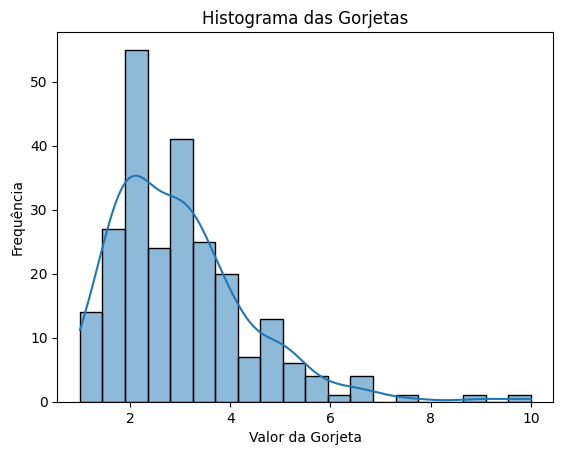

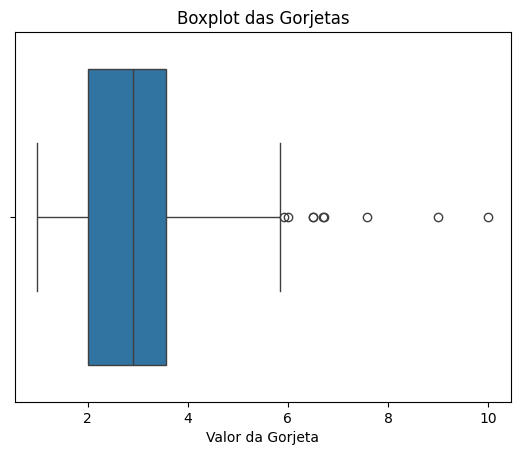

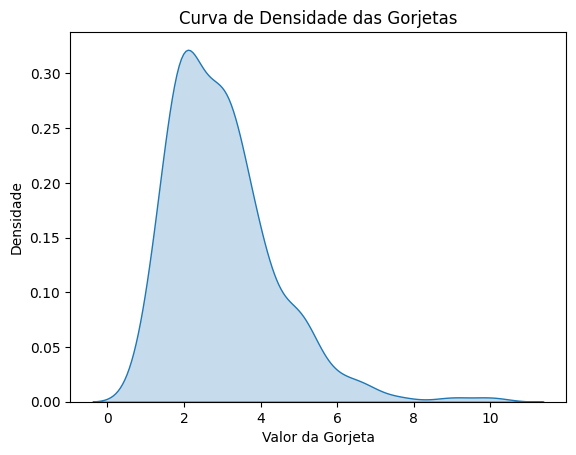

In [27]:
# Histograma
sns.histplot(valores, kde=True, bins=20)
plt.title('Histograma das Gorjetas')
plt.xlabel('Valor da Gorjeta')
plt.ylabel('Frequência')
plt.show()

# Boxplot
sns.boxplot(x=valores)
plt.title('Boxplot das Gorjetas')
plt.xlabel('Valor da Gorjeta')
plt.show()

# Curva de densidade
sns.kdeplot(valores, fill=True)
plt.title('Curva de Densidade das Gorjetas')
plt.xlabel('Valor da Gorjeta')
plt.ylabel('Densidade')
plt.show()

# 5. **Análise de Correlação**

Ela ajuda a responder: *“como duas variáveis se relacionam entre si?”*

As principais medidas são:  
- **Covariância**: indica a direção do relacionamento entre duas variáveis (positiva ou negativa).  
- **Correlação de Pearson**: mede a força e a direção de uma relação **linear** entre duas variáveis numéricas.  
- **Correlação de Spearman**: mede a relação **monotônica** entre duas variáveis, útil quando os dados não seguem distribuição normal ou possuem outliers.

Cada uma tem seu papel:  
- **Covariância** → mostra a tendência de duas variáveis aumentarem ou diminuírem juntas, mas não é facilmente interpretável em termos de magnitude.  
- **Correlação de Pearson** → padrão para medir associação linear; varia de -1 a 1, sendo 0 ausência de relação linear.  
- **Correlação de Spearman** → mais robusta para dados não lineares ou ordinais; também varia de -1 a 1.

Essa análise permite entender se, por exemplo, **o valor da conta está associado ao valor da gorjeta**, ou se existe algum outro padrão de relacionamento entre variáveis numéricas.


In [17]:
# Correlação
cov = dados[['total_bill', 'tip']].cov()
corr_pearson = dados[['total_bill', 'tip']].corr(method='pearson')
corr_spearman = dados[['total_bill', 'tip']].corr(method='spearman')

print("\nCovariância:\n", cov)
print("\nCorrelação de Pearson:\n", corr_pearson)
print("\nCorrelação de Spearman:\n", corr_spearman)


Covariância:
             total_bill       tip
total_bill   79.252939  8.323502
tip           8.323502  1.914455

Correlação de Pearson:
             total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000

Correlação de Spearman:
             total_bill       tip
total_bill    1.000000  0.678968
tip           0.678968  1.000000


# 6. **Análise Categórica**

Ela ajuda a responder: *“como diferentes grupos ou categorias se comportam nos meus dados?”*

As principais ferramentas são:  
- **Tabelas de Frequência**: mostram quantas observações existem em cada categoria.  
- **Crosstab (tabelas cruzadas)**: permitem analisar a relação entre duas variáveis categóricas.  
- **Gráficos de barras e setores**: ajudam a visualizar comparações entre categorias de forma clara.

Cada uma tem seu papel:  
- **Tabelas de Frequência** → ideal para entender a distribuição das observações dentro de cada categoria.  
- **Crosstab** → ótimo para identificar padrões ou associações entre duas variáveis categóricas.  
- **Gráficos de barras e setores** → facilitam a interpretação visual de dados categóricos, mostrando rapidamente qual categoria é mais frequente ou relevante.

Essa análise permite responder perguntas como:  
- Quais dias da semana recebem mais gorjetas?  
- Homens e mulheres têm comportamento diferente nas gorjetas?  
- Existem categorias que se destacam ou apresentam padrões consistentes?



Frequência por dia:
 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Média de gorjetas por dia:
 day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

Média de gorjetas por sexo:
 sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


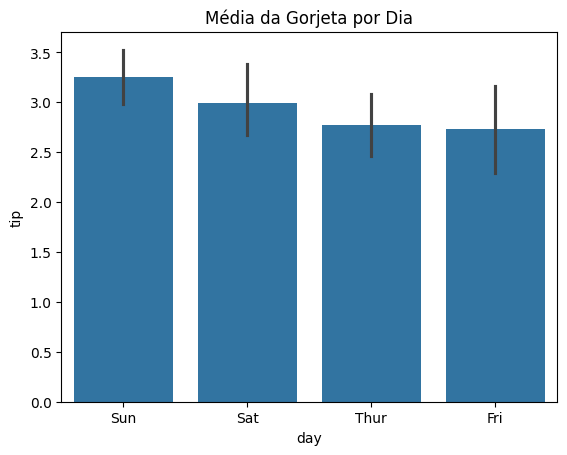

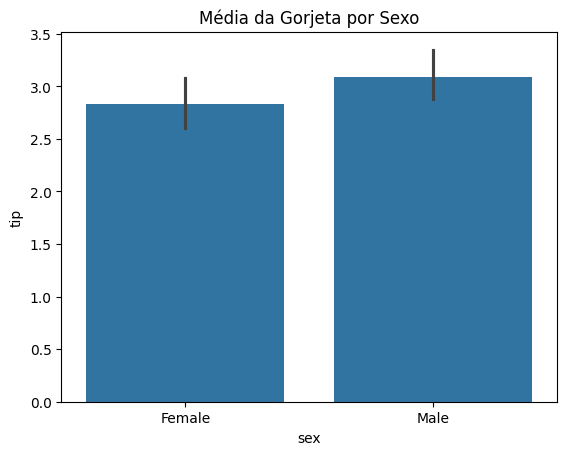

In [18]:
# Frequência por dia
freq_day = dados['day'].value_counts()
print("\nFrequência por dia:\n", freq_day)

# Média de gorjetas por dia
media_por_dia = dados.groupby('day')['tip'].mean()
print("\nMédia de gorjetas por dia:\n", media_por_dia)

# Média de gorjetas por sexo
media_por_sexo = dados.groupby('sex')['tip'].mean()
print("\nMédia de gorjetas por sexo:\n", media_por_sexo)

# Gráfico de barras - média da gorjeta por dia
sns.barplot(x='day', y='tip', data=dados)
plt.title("Média da Gorjeta por Dia")
plt.show()

# Gráfico de barras - média da gorjeta por sexo
sns.barplot(x='sex', y='tip', data=dados)
plt.title("Média da Gorjeta por Sexo")
plt.show()

# 7. **Visualização Exploratória**

Ela ajuda a responder: *“como meus dados se comportam de forma visual e intuitiva?”*

Os gráficos permitem identificar padrões, tendências, comparações e possíveis outliers de forma rápida.  

Principais tipos de gráficos:  
- **Gráficos de barras** → ideal para comparar categorias ou contar frequência de observações.  
- **Gráficos de setores (pizza)** → útil para mostrar a proporção de cada categoria dentro do total.  
- **Histogramas** → para observar a distribuição de variáveis numéricas.  
- **Boxplots** → para identificar mediana, quartis e outliers.  
- **Curvas de densidade (KDE)** → para entender a concentração dos dados de forma contínua.

Essas visualizações ajudam a responder perguntas como:  
- Quantas gorjetas são dadas em cada dia da semana?  
- Qual é a distribuição de clientes por sexo?  
- Qual dia recebe mais clientes?  


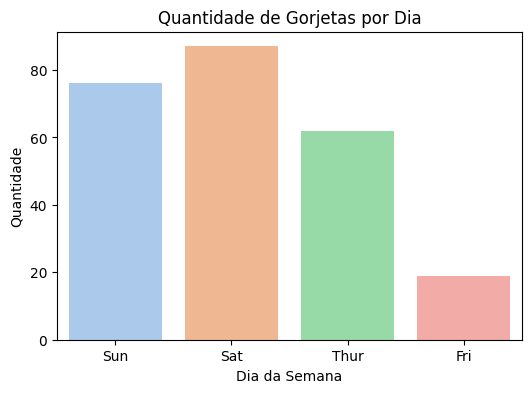

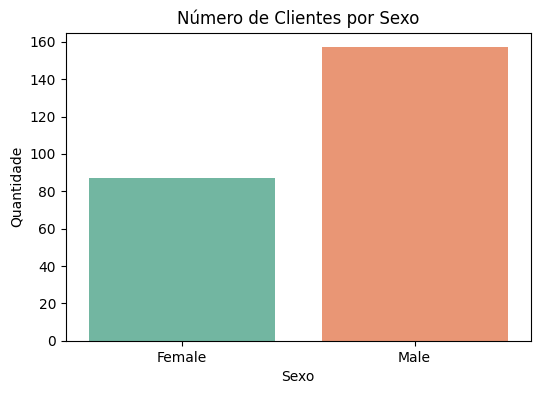

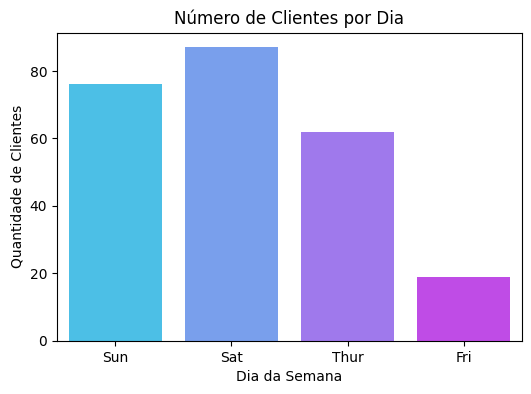

In [24]:
# Número de gorjetas por dia
plt.figure(figsize=(6,4))
sns.countplot(x='day', data=dados, hue='day', palette='pastel', legend=False)
plt.title("Quantidade de Gorjetas por Dia")
plt.xlabel("Dia da Semana")
plt.ylabel("Quantidade")
plt.show()

# Número de clientes por sexo
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=dados, hue='sex', palette='Set2', legend=False)
plt.title("Número de Clientes por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.show()

# Número de clientes por dia (total de clientes no restaurante)
plt.figure(figsize=(6,4))
sns.countplot(x='day', data=dados, hue='day', palette='cool', legend=False)
plt.title("Número de Clientes por Dia")
plt.xlabel("Dia da Semana")
plt.ylabel("Quantidade de Clientes")
plt.show()